# Linear Regression

Regression analysis is a set of process for estimating the relationship between an dependent variable and one or more independent variables.

The idea is to predict continues variables. Such as sales, amount, quantity, ...

-----------------------------------------

On the following example, lets predict the price of a diamond in Dollars.

# Regression Module and Setup

In [1]:
#import data set
from pycaret.datasets import get_data
dataset = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [2]:
dataset.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [3]:
dataset.tail()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
5995,1.03,Ideal,D,SI1,EX,EX,GIA,6250
5996,1.00,Very Good,D,SI1,VG,VG,GIA,5328
5997,1.02,Ideal,D,SI1,EX,EX,GIA,6157
5998,1.27,Signature-Ideal,G,VS1,EX,EX,GIA,11206
5999,2.19,Ideal,E,VS1,EX,EX,GIA,30507


In [4]:
dataset.shape

(6000, 8)

In [5]:
dataset.columns

Index(['Carat Weight', 'Cut', 'Color', 'Clarity', 'Polish', 'Symmetry',
       'Report', 'Price'],
      dtype='object')

In [6]:
dataset.describe()

,Carat Weight,Price
count,6000.000000,6000.000000
mean,1.334520,11791.579333
std,0.475696,10184.350051
min,0.750000,2184.000000
25%,1.000000,5150.500000
50%,1.130000,7857.000000
75%,1.590000,15036.500000
max,2.910000,101561.000000


In [7]:
data_train = dataset.sample(frac = 0.9, random_state = 786)

In [8]:
data_train.shape

(5400, 8)

In [9]:
data_train.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
5333,1.50,Good,E,VS2,VG,G,GIA,12702
3749,1.08,Ideal,D,VS2,EX,EX,GIA,8481
2376,2.25,Good,I,VS2,G,VG,GIA,18623
3756,2.27,Very Good,G,VS2,VG,VG,GIA,27252
4248,1.20,Ideal,F,VS1,EX,EX,GIA,9641


In [10]:
data_test = dataset.drop(data_train.index)

In [11]:
data_test.shape

(600, 8)

In [12]:
data_test.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
5,1.53,Ideal,E,SI1,ID,ID,AGSL,12791
7,1.50,Fair,F,SI1,VG,VG,GIA,10450
11,1.01,Good,E,SI1,G,G,GIA,5161
13,2.51,Very Good,G,VS2,VG,VG,GIA,34361
18,1.01,Good,I,SI1,VG,VG,GIA,4238


In [13]:
data_train.reset_index(drop = True, inplace = True)

In [14]:
data_train.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.50,Good,E,VS2,VG,G,GIA,12702
1,1.08,Ideal,D,VS2,EX,EX,GIA,8481
2,2.25,Good,I,VS2,G,VG,GIA,18623
3,2.27,Very Good,G,VS2,VG,VG,GIA,27252
4,1.20,Ideal,F,VS1,EX,EX,GIA,9641


In [15]:
data_test.reset_index(drop = True, inplace = True)

In [16]:
data_test

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.53,Ideal,E,SI1,ID,ID,AGSL,12791
1,1.50,Fair,F,SI1,VG,VG,GIA,10450
2,1.01,Good,E,SI1,G,G,GIA,5161
3,2.51,Very Good,G,VS2,VG,VG,GIA,34361
4,1.01,Good,I,SI1,VG,VG,GIA,4238
...,...,...,...,...,...,...,...,...
595,1.02,Very Good,F,SI1,G,G,GIA,5430
596,2.05,Good,G,VS1,G,VG,GIA,26297
597,2.01,Very Good,E,VS2,EX,VG,GIA,27002
598,1.03,Ideal,D,SI1,EX,EX,GIA,6250


## Setup the environment

In [17]:
from pycaret.regression import *

In [18]:
reg = setup(data = data_train,
           target = 'Price',
           session_id = 123)

,Description,Value
0,Session id,123
1,Target,Price
2,Target type,Regression
3,Original data shape,"(5400, 8)"
4,Transformed data shape,"(5400, 29)"
5,Transformed train set shape,"(3779, 29)"
6,Transformed test set shape,"(1621, 29)"
7,Ordinal features,1
8,Numeric features,1
9,Categorical features,6


* **Session id**: The same as seed. Reproduce the same results.
* **Target**: Y variable. Dependent Variable. The one we want to predict.

In [19]:
best = compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,758.7793,2661557.6112,1584.1538,0.9743,0.0820,0.0608,0.3220
rf,Random Forest Regressor,760.1499,2944058.4839,1663.3278,0.9714,0.0815,0.0596,0.3260
lightgbm,Light Gradient Boosting Machine,752.6246,3056225.3710,1687.9572,0.9711,0.0773,0.0567,0.1420
gbr,Gradient Boosting Regressor,919.8439,3757700.7801,1899.5914,0.9634,0.1024,0.0770,0.1370
dt,Decision Tree Regressor,1011.9136,5382439.9624,2244.3755,0.9465,0.1082,0.0779,0.0710
ridge,Ridge Regression,2413.5698,14120482.9350,3726.1631,0.8621,0.6689,0.2875,0.0640
lasso,Lasso Regression,2412.1916,14246796.5754,3744.2300,0.8608,0.6767,0.2866,0.0880
llar,Lasso Least Angle Regression,2412.2092,14246792.3690,3744.2301,0.8608,0.6759,0.2866,0.0640
br,Bayesian Ridge,2415.8031,14270771.8397,3746.9951,0.8606,0.6696,0.2873,0.0640
lr,Linear Regression,2474.7280,14652718.9357,3799.3149,0.8568,0.6857,0.2971,0.7610


In [20]:
ada = create_model('ada')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4080.0999,23121985.4551,4808.5326,0.7461,0.4764,0.5439
1,4239.3873,29144977.0921,5398.6088,0.7766,0.4896,0.5657
2,4115.3772,22551428.7686,4748.8345,0.7932,0.5129,0.6000
3,4119.4643,21945053.3514,4684.5548,0.7579,0.4895,0.5651
4,3867.6869,23771595.4934,4875.6123,0.7035,0.5020,0.5753
5,4566.5918,29734065.5734,5452.8952,0.7462,0.5462,0.6598
6,4579.1747,27307381.2636,5225.6465,0.7435,0.5564,0.6684
7,4452.1777,27132949.4658,5208.9298,0.6569,0.5166,0.6087
8,3898.6388,20736804.1547,4553.7681,0.7964,0.4808,0.5460


In [21]:
tuned_ada = tune_model(ada)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2629.7158,16222922.0054,4027.7689,0.8219,0.2553,0.2244
1,2788.9021,25406553.6803,5040.4914,0.8053,0.2737,0.2378
2,2595.0176,17243786.1133,4152.5638,0.8418,0.2601,0.2327
3,2588.0395,14475338.1062,3804.6469,0.8403,0.2685,0.2271
4,2403.7173,13602075.2435,3688.0991,0.8303,0.2672,0.2223
5,2538.7416,20724600.2592,4552.4280,0.8231,0.2644,0.2260
6,2720.2195,19796302.1522,4449.3036,0.8140,0.2644,0.2280
7,2707.6016,17084596.1502,4133.3517,0.7839,0.2743,0.2475
8,2444.0262,16340453.5625,4042.3327,0.8395,0.2623,0.2199


Fitting 10 folds for each of 10 candidates, totalling 100 fits


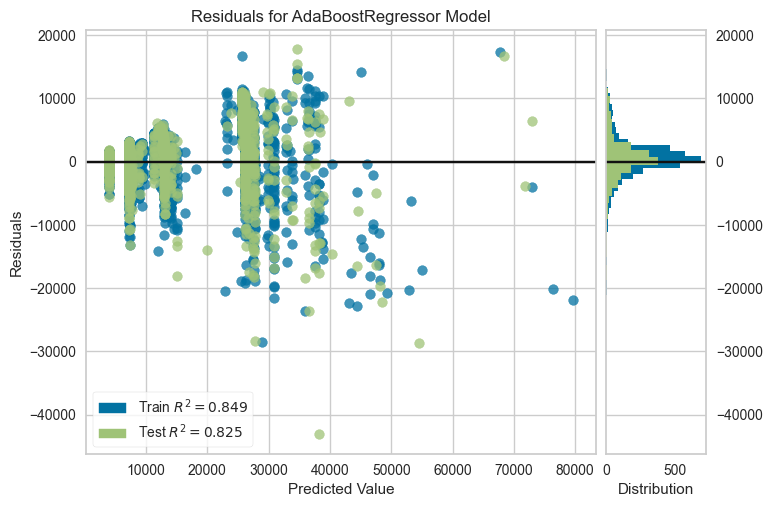

In [22]:
plot_model(tuned_ada)

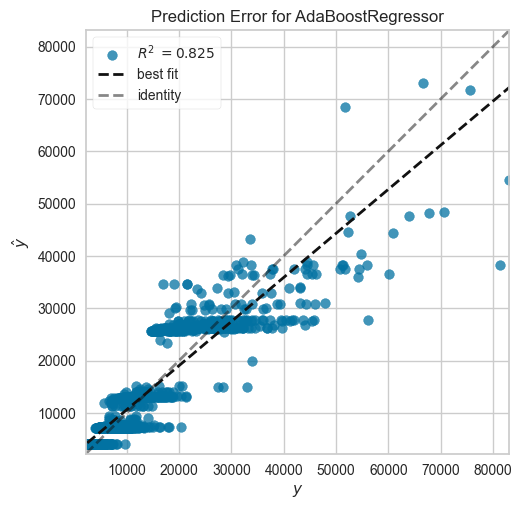

In [23]:
plot_model(tuned_ada, plot = 'error')

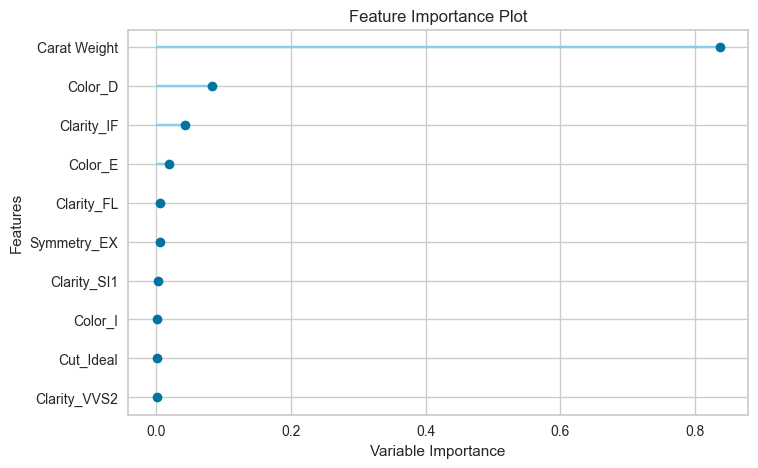

In [24]:
plot_model(tuned_ada, plot = 'feature')

In [25]:
predict_model(tuned_ada)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,AdaBoost Regressor,2753.5560,19239427.3255,4386.2772,0.8245,0.2717,0.2331


,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,prediction_label
3172,1.16,Ideal,E,SI1,EX,EX,GIA,7059,7289.223684
658,1.14,Ideal,G,SI1,EX,VG,GIA,5809,7262.857419
3180,1.25,Very Good,G,IF,VG,VG,GIA,10641,8881.645401
1340,0.79,Ideal,G,SI1,VG,EX,GIA,2871,4021.384309
586,2.23,Very Good,H,VS2,VG,VG,GIA,21706,27516.784226
...,...,...,...,...,...,...,...,...,...
790,1.22,Ideal,F,VVS1,EX,EX,GIA,12906,7311.014368
4934,0.83,Ideal,E,SI1,G,EX,GIA,3235,4021.384309
469,1.51,Very Good,I,VS2,VG,VG,GIA,9058,12837.652605
2061,1.16,Ideal,I,SI1,EX,VG,GIA,5091,7289.223684


In [26]:
test_pred = predict_model(tuned_ada, data = data_test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,AdaBoost Regressor,2733.5775,17439720.1618,4176.0891,0.8305,0.2634,0.2313


In [27]:
test_pred.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,prediction_label
0,1.53,Ideal,E,SI1,ID,ID,AGSL,12791,13004.518519
1,1.50,Fair,F,SI1,VG,VG,GIA,10450,13004.518519
2,1.01,Good,E,SI1,G,G,GIA,5161,7153.337150
3,2.51,Very Good,G,VS2,VG,VG,GIA,34361,30896.385321
4,1.01,Good,I,SI1,VG,VG,GIA,4238,7153.337150


In [28]:
save_model(tuned_ada, 'Regression Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Carat Weight'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Cut', 'Color', 'Clarity',
                                              'Polish', 'Symmetry', 'Report'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['Rep...
                  TransformerWrapper(include=['Cut', 'Color', 'Clarity',
                                              'Polish', 'Symmetry'],
                                     transformer=OneHotEncoder(cols=['Cut',
                                                                     'Color',
                                                                     'Clarity',
                                     

In [29]:
saved_final_model = load_model('Regression Model')

Transformation Pipeline and Model Successfully Loaded


In [30]:
new_prediction = predict_model(saved_final_model, data = data_test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,AdaBoost Regressor,2733.5775,17439720.1618,4176.0891,0.8305,0.2634,0.2313


In [31]:
new_prediction.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,prediction_label
0,1.53,Ideal,E,SI1,ID,ID,AGSL,12791,13004.518519
1,1.50,Fair,F,SI1,VG,VG,GIA,10450,13004.518519
2,1.01,Good,E,SI1,G,G,GIA,5161,7153.337150
3,2.51,Very Good,G,VS2,VG,VG,GIA,34361,30896.385321
4,1.01,Good,I,SI1,VG,VG,GIA,4238,7153.337150
